<a href="https://colab.research.google.com/github/kshitijrajsharma/raw-data-api/blob/develop/docs/src/examples/Example_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Raw Data API Basic Usage in Python

<a href="https://colab.research.google.com/github/kshitijrajsharma/raw-data-api/blob/develop/Raw_Data_API_Basic_Use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import time
import geopandas as gpd

## Define your API Endpoint
### Create your payload with your geometry and learn more about payload in API docs , API_URL/docs

In [2]:
# defining the api-endpoint
BASE_API_URL = 'https://api-prod.raw-data.hotosm.org/v1'

payload = {
  "outputType": "geojson",
  "fileName": "My_Export",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          83.96919250488281,
          28.194446860487773
        ],
        [
          83.99751663208006,
          28.194446860487773
        ],
        [
          83.99751663208006,
          28.214869548073377
        ],
        [
          83.96919250488281,
          28.214869548073377
        ],
        [
          83.96919250488281,
          28.194446860487773
        ]
      ]
    ]
  },
  "filters": {
    "tags": {
      "all_geometry": {
        "join_or": {
          "building": ["yes"]
        }
      }
    },
  },
  "geometryType": [
    "point",
    "polygon"
  ]
}

## Call API
### Make API call , Wait for api to finish its work poll its status

In [4]:
headers = {'accept': "application/json","Content-Type": "application/json"}

# making call to the api to get boundary
task_response = requests.post(url = f"{BASE_API_URL}/snapshot/", data = json.dumps(payload),headers=headers)

task_response.raise_for_status()
result = task_response.json() # I will be on queue and it gives my unique task_id and link to track it
print(result)
task_track_url = result['track_link']
stop_loop = False
while not stop_loop:
  check_result = requests.get(url=f"{BASE_API_URL}{task_track_url}")
  check_result.raise_for_status()
  res=check_result.json() # status will tell current status of your task after it turns to success it will give result
  if res['status'] == 'SUCCESS'or res['status'] == 'FAILED':
    stop_loop= True
  time.sleep(2) # check every two second
print(res)

{'task_id': 'fcbb860e-221f-45f4-bc00-6d16a3e6039c', 'track_link': '/tasks/status/fcbb860e-221f-45f4-bc00-6d16a3e6039c/', 'queue': 0}
{'id': 'fcbb860e-221f-45f4-bc00-6d16a3e6039c', 'status': 'SUCCESS', 'result': {'download_url': 'https://s3.dualstack.us-east-1.amazonaws.com/production-raw-data-api/default/My_Export_geojson_uid_fcbb860e-221f-45f4-bc00-6d16a3e6039c.zip', 'file_name': 'My_Export', 'process_time': 'a moment', 'query_area': '6.32 Sq Km', 'binded_file_size': '4.21 MB', 'zip_file_size_bytes': 542746}}


## Process API
### Open file , read , do rest of your stuff

                    geometry      osm_id osm_type  version  \
0  POINT (83.98476 28.21112)  5578045433    nodes        2   
1  POINT (83.98488 28.21129)  5578045429    nodes        1   

                                                tags  changeset  \
0  {'name': 'Giri Complex', 'building': 'yes', 'b...   59871828   
1  {'name': 'Dipendra City Hall', 'building': 'yes'}   58402131   

             timestamp  
0  2018-06-15T11:25:56  
1  2018-04-25T09:26:56  


<Axes: >

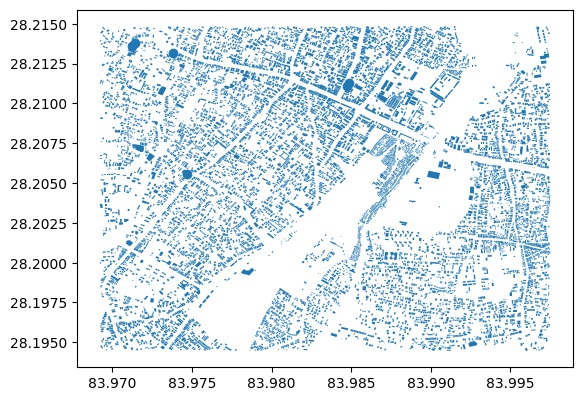

In [5]:
import io
import urllib.request
import zipfile

# Download the zip file from the URL
url = res['result']['download_url']
response = urllib.request.urlopen(url)

# Open the zip file from the response data
with zipfile.ZipFile(io.BytesIO(response.read()), 'r') as zip_ref:
    with zip_ref.open('My_Export.geojson') as file:
        my_export_geojson=json.loads(file.read())

df = gpd.GeoDataFrame.from_features(my_export_geojson['features'])
print(df.head(2))
df.plot()